In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train = datagen.flow_from_directory('/content/drive/MyDrive/final_year_project/train_resized_data',class_mode='categorical',batch_size=32,target_size=(256,256))
test = datagen.flow_from_directory('/content/drive/MyDrive/final_year_project/test_resized_data',class_mode='categorical',batch_size=32,target_size=(256,256))
valid = datagen.flow_from_directory('/content/drive/MyDrive/final_year_project/validation_resized_data',class_mode='categorical',batch_size=32,target_size=(256,256))

Found 5031 images belonging to 6 classes.
Found 628 images belonging to 6 classes.
Found 632 images belonging to 6 classes.


In [ ]:
x_train,xt=train.next()
print('Batch shape=',x_train.shape,'min=',x_train.min(),'max=',x_train.max())

Batch shape= (32, 256, 256, 3) min= 0.0 max= 1.0


In [ ]:
classes=["apple","banana","guava","lime","orange","pomegranete"]

In [ ]:
from keras.optimizers import Adam


In [ ]:
learning_rate = 0.000001  # Adjust this value as needed

# Create Adam optimizer with custom learning rate
optimizer = Adam(learning_rate=learning_rate)

In [ ]:
import keras

In [ ]:
model=keras.models.Sequential([
    #1
    keras.layers.Conv2D(filters=90,kernel_size=(5,5),strides=(2,2),activation='relu',input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    #2
    keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    #3

    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Flatten(),
    #6
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dropout(0.5),


    keras.layers.Dense(6,activation='softmax')

])
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 90)      6840      
                                                                 
 batch_normalization (Batch  (None, 126, 126, 90)      360       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 90)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 256)       207616    
                                                                 
 batch_normalization_1 (Bat  (None, 63, 63, 256)       1024      
 chNormalization)                                                
                                                        

In [ ]:
history=model.fit(train,epochs=10,validation_data=valid)


Epoch 1/10
158/158 [==============================] - 2483s 16s/step - loss: 2.3500 - accuracy: 0.3522 - val_loss: 1.9505 - val_accuracy: 0.1709
Epoch 2/10
158/158 [==============================] - 939s 6s/step - loss: 1.1500 - accuracy: 0.6239 - val_loss: 1.8890 - val_accuracy: 0.1646
Epoch 3/10
158/158 [==============================] - 978s 6s/step - loss: 0.7171 - accuracy: 0.7579 - val_loss: 1.0637 - val_accuracy: 0.6772
Epoch 4/10
158/158 [==============================] - 935s 6s/step - loss: 0.5339 - accuracy: 0.8211 - val_loss: 0.3043 - val_accuracy: 0.9304
Epoch 5/10
158/158 [==============================] - 938s 6s/step - loss: 0.4088 - accuracy: 0.8589 - val_loss: 0.1371 - val_accuracy: 0.9652
Epoch 6/10
158/158 [==============================] - 928s 6s/step - loss: 0.3049 - accuracy: 0.8984 - val_loss: 0.0960 - val_accuracy: 0.9778
Epoch 7/10
158/158 [==============================] - 922s 6s/step - loss: 0.2677 - accuracy: 0.9127 - val_loss: 0.0744 - val_accuracy: 0.98

In [10]:
model.save('/content/drive/MyDrive/final_year_project/model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
model.evaluate(test)

20/20 [==============================] - 313s 16s/step - loss: 0.0347 - accuracy: 0.9952


[0.03467023745179176, 0.9952229261398315]

In [13]:
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = '/content/drive/MyDrive/final_year_project/test_resized_data/Apple/Apple (10).png'  # Replace 'path_to_your_image.jpg' with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Load the image and resize it to match the input shape (256x256)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = img_array / 255.0
predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)
print(classes[predicted_class_index])

1/1 [==============================] - 1s 511ms/step
apple


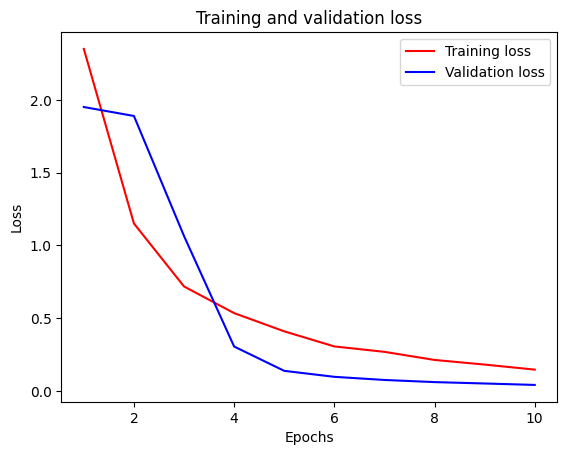

In [20]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot model loss vs. epoch
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/final_year_project/loss_plot1.png')
plt.show()


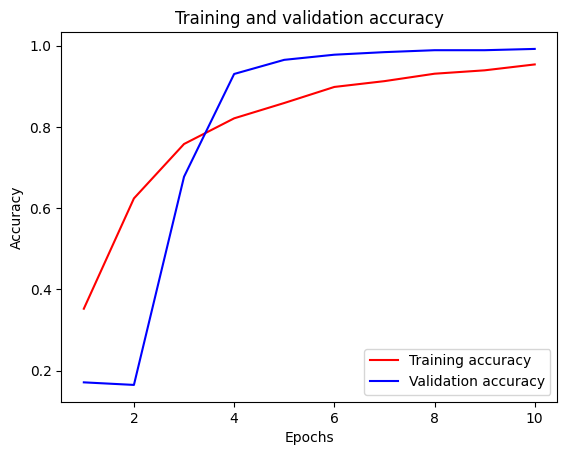

In [19]:
import matplotlib.pyplot as plt

# Get training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot model accuracy vs. epoch
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/final_year_project/accuracy_plot1.png')
plt.show()
